In [1]:
#pip install nbinteract

### A case study: using CLUE datasets of Melbourne Open Data

# **Where should public transportation be enhanced in the city of Melbourne?**

The City of Melbourne has always evolved, and so have the numbers of its residential dwellings and employment population. Without a consistent or parallel increase of off-street parking, the city will face the difficulty in providing enough spaces for parking of private transportation. To resolve this problem, the city planner needs to locate the potential areas where extension of public transportation should be implemented to replace the need for off-street parking.

The Trends of residential dwellings and employments from 2002 to 2019 using CLUE datasets of Melbourne Open Data:
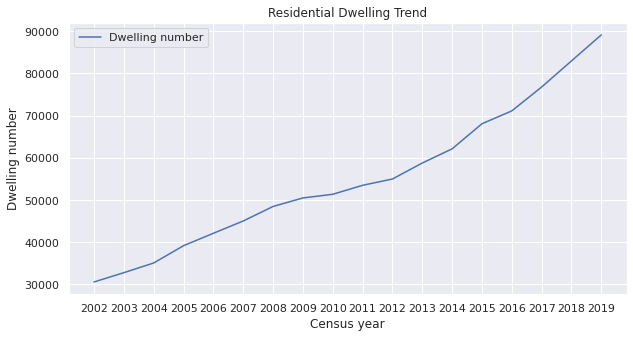
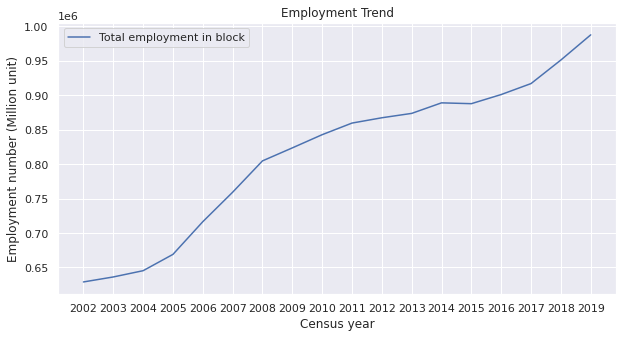

## Purpose: 
This case study is intended to provide educational instructions of how CLUE datasets can be used for city planners or individuals whose have some knowledge in data analysis.

## Pre-requisite skills:
- Python scripting (Basic)
- Data analysis (Basic EDA and visualizations)

## Solution:
By looking at the population trend of residential dwellings and employments at different Melbourne city blocks, the city planner can project amount of public transportation services necessary to sufficiently accommodate potential travellers to or/and from those city blocks.



# **Working with Residential dwelling datasets**

Total records before cleaning is 177733
Total records before cleaning is 177729


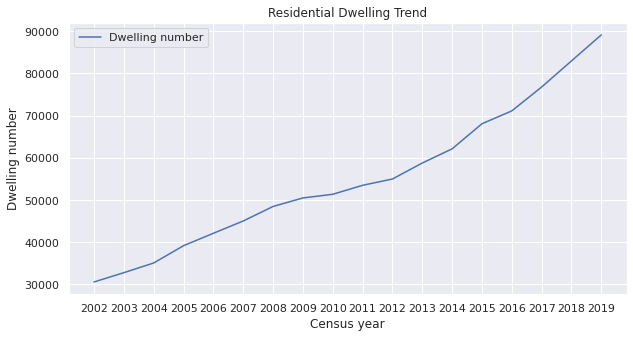

In [7]:
#CLUE datasets
#======================================================
import pandas as pd
import seaborn as sns
sns.set_theme(color_codes=True)

#Residential dwellings data
resident = pd.read_csv('/content/drive/MyDrive/Notebooks/SIT782/CLUE/Residential_dwellings.csv')

#Total records before cleaning
print('Total records before cleaning is',len(resident))

#Data cleaning (remove duplicated values)
resident.drop_duplicates(inplace = True)

#Total records after cleaning
print('Total records before cleaning is',len(resident))

#Select only necessary columns
selected_columns =['Census year','Block ID','CLUE small area','Dwelling number']
resident = resident[selected_columns]

#Sum the Dwelling number based on Block ID and Year
resident_by_block = resident.groupby(['Census year','Block ID']).agg({'CLUE small area':'max','Dwelling number':'sum'})

#plot the residential dwellings
xTicks = range(2002,2020,1)
resident_by_block.groupby(['Census year']).sum()[:-1].plot.line(xticks = xTicks,
                                                                figsize=(10,5),
                                                                title='Residential Dwelling Trend',
                                                                ylabel = 'Dwelling number')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Working with Emploment datasets**

Total records before cleaning is 11182
Total records afer cleaning is 8759


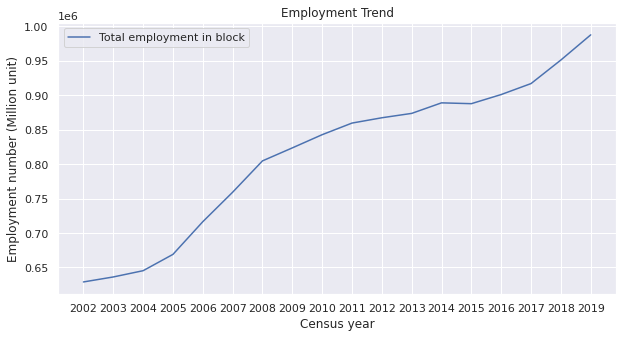

In [9]:
#Employment data
employment = pd.read_csv('/content/drive/MyDrive/Notebooks/SIT782/CLUE/Employment_by_block_by_CLUE_industry.csv')

#Total records before cleaning
print('Total records before cleaning is',len(employment))

#Cleaning the data (remove missing values at [Total employment in block])
employment.dropna(subset=['Total employment in block'],inplace=True)

#Total records after cleaning
print('Total records afer cleaning is',len(employment))

#Select only necessary columns
selected_columns =['Census year','Block ID','Total employment in block']
employment = employment[selected_columns]
employment

#Sum the employment based on Block ID and Year
employment_by_block = resident.groupby(['Census year','Block ID']).sum()

#Sum the employment number based on Block ID and Year
employment_by_block = employment.groupby(['Census year','Block ID']).sum()

#plot the residential dwellings
xTicks = range(2002,2020,1)
employment_by_block.groupby(['Census year']).sum()[:-1].plot.line(xticks = xTicks,
                                                                figsize=(10,5),
                                                                title='Employment Trend',
                                                                ylabel = 'Employment number (Million unit)'
                                                                )

# **Working with Off-street Parking datasets**

In [10]:
#Off-street parking data
parking = pd.read_csv('/content/drive/MyDrive/Notebooks/SIT782/CLUE/Off-street_car_parks_with_capacity_and_type.csv')

#Total records before cleaning
print('Total records before cleaning is',len(parking))

#Data cleaning (remove duplicate values)
parking.drop_duplicates(inplace=True)

#Total records after cleaning
print('Total records after cleaning is',len(parking))

#Select only necessary columns
selected_columns =['Census year','Block ID','Parking spaces']
parking = parking[selected_columns]

#Sum the parking based on Block ID and Year
parking_by_block = parking.groupby(['Census year','Block ID']).sum()
parking_by_block


Total records before cleaning is 124114
Total records after cleaning is 122461


Parking spaces
Census year Block ID                
2002        1                    270
            6                    500
            11                   303
            12                   749
            13                   622
...                              ...
2020        2543                   1
            2544                  39
            2545                   2
            2546                  16
            2547                 272

[9939 rows x 1 columns]

# **Merge and explore the 3 datasets (Resident, Employment, & Parking)**

Formulate the model to identify a suitable number of parking slots based on residential dwelling or employment.

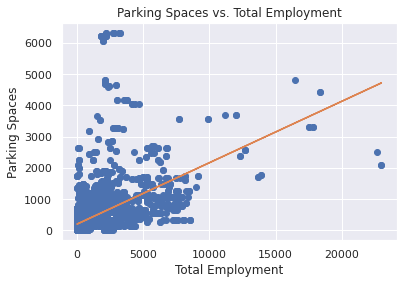

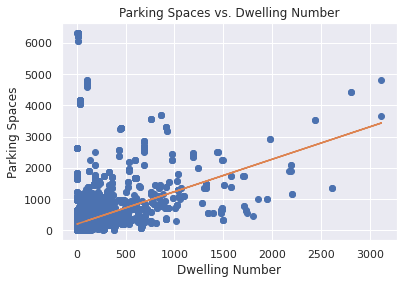

In [11]:
import matplotlib.pyplot as plt
import numpy as np

#Combine the datasets
data = resident_by_block.merge(employment_by_block, left_index= True, right_index=True)
data = data.merge(parking_by_block,left_index=True,right_index=True)

#Find the linear regression model between parking space (Y) and employment (X1)
x1 = data['Total employment in block']
x2 = data['Dwelling number']
y = data['Parking spaces']

#Plot the data points (Parking Spaces vs. Total Employment) and regression line
plt.plot(x1,y,'o')
a, b = np.polyfit(x1,y,1)
plt.plot(x1, a*x1 + b)
plt.title('Parking Spaces vs. Total Employment')
plt.ylabel('Parking Spaces')
plt.xlabel('Total Employment')
plt.show()

#Plot the data points (Parking Spaces vs. Dwelling Number) and regression line
plt.plot(x2,y,'o')
a, b = np.polyfit(x2,y,1)
plt.plot(x2, a*x2 + b)
plt.title('Parking Spaces vs. Dwelling Number')
plt.ylabel('Parking Spaces')
plt.xlabel('Dwelling Number')
plt.show()


# **Modeling and Analyzing**

In [31]:
#Year to include in the study (from 2002 to 2020 or between that)
#Create a widget to select the range of study years
from ipywidgets import Box, Layout, interact
import ipywidgets as widgets
from IPython.display import display

style = {'description_width': 'initial'} #for long label

#Year-to-include slider
years = widgets.IntRangeSlider(
    value=[2002, 2020],
    min=2002,
    max=2020,
    step=1,
    description='Years to include:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)
#Display option: impact level
show_impact = widgets.IntSlider(
    value=10,
    min=10,
    max=100,
    step=1,
    description='Impact index from:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)
#Employment checkbox
chk_1 = widgets.Checkbox(
    value=True,
    description='Employment',
    disabled=False,
    indent=False,
    continuous_updates=True
)
#Residential Dwellings checkbox
chk_2 = widgets.Checkbox(
    value=True,
    description='Residential Dwellings',
    disabled=False,
    indent=False,
    continuous_update=True
)
items = [years,chk_1, chk_2, show_impact]
box = Box(children = items, layout=Layout(
    display='flex',
    flex_flow='column',
    align_items='stretch',
    width='50%'))

#update the interativity of checkbox
out = widgets.Output()
@out.capture()
def value_changed(change):
  if (chk_1.value) & (not(chk_2.value)):
    chk_1.disabled = True
  elif (not(chk_1.value)) & (chk_2.value):
    chk_2.disabled =True
  elif (chk_1.value) & (chk_2.value):
    chk_1.disabled = False
    chk_2.disabled = False
  else: 
    chk_1.value = True
    chk_2.disabled = False
chk_1.observe(value_changed)
chk_2.observe(value_changed)

print('Interactive options:')
print('--------------------')
display(box)


Interactive options:
--------------------


Box(children=(IntRangeSlider(value=(2002, 2020), description='Years to include:', max=2020, min=2002, style=Sl…

In [30]:
def showX(x):
  return x
interact(showX,x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.showX(x)>

The study period is between: 2002 and 2020
The linear regression model is:
[Parking spaces] = 39.51 + 0.34[Total employment in block] + 0.68[Dwelling number]




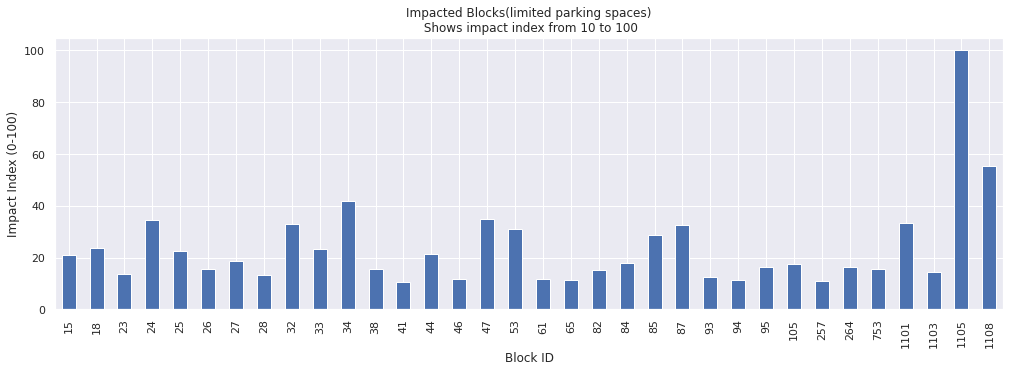

Table shows the impacted blocks (limited parking) by order of Impact Index.



,CLUE small area,Dwelling number,Total employment in block,Parking spaces,Predict_parking,Impact_index
Block ID,,,,,,
1105,Docklands,189,22612.0,2507,7950.0,100.000000
1108,Docklands,3118,16425.0,4800,7822.0,55.520852
34,Melbourne (CBD),32,7390.0,328,2604.0,41.815175
47,Melbourne (CBD),323,7837.0,1059,2957.0,34.870476
24,Melbourne (CBD),175,7580.0,887,2767.0,34.539776
1101,Docklands,120,8949.0,1378,3201.0,33.492559
32,Melbourne (CBD),104,6966.0,719,2508.0,32.867904
87,Melbourne (CBD),915,4366.0,387,2167.0,32.702554
53,Melbourne (CBD),192,6026.0,553,2244.0,31.067426


In [13]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

#Prepare Data
years_to_include = range(years.get_interact_value()[0],years.get_interact_value()[1]+1,1)
features = np.array(['Total employment in block', 'Dwelling number'])
features_to_include = features[[chk_1.value,chk_2.value]]
features[[False,True]]
data_to_include = data.loc[years_to_include] #Get the wanted rows
X = np.array(data_to_include[features_to_include]) #Get the independent variable(s)
Y = np.array(data_to_include['Parking spaces']) #Get the dependent variable
print('The study period is between: %d and %d'%(min(years_to_include),max(years_to_include)))

#build the regression model
lof = LocalOutlierFactor() #use outliers detector
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X) #Search for outliers
lm = linear_model.LinearRegression()
lm.fit(X[yhat!=-1],Y[yhat!=-1]) # Train the model excluding outliers

#Get structure of the linear equation
str_temp = ''
print('The linear regression model is:')
for i in range(len(lm.coef_)):
  str_temp += str(format(lm.coef_[i], '.2f')) + '[' + features_to_include[i] +']'
  if (i+1<len(lm.coef_)):
    str_temp += ' + '
print('[Parking spaces] = {} + {}\n\n'.format(format(lm.intercept_,'.2f'),str_temp))

#Build the Impact Index based on the latest year (2020 cencus)
data_latest = data.loc[years.max]
result = np.round(lm.predict(np.array(data_latest[features_to_include])))
data_latest['Predict_parking'] = result
impact = result - data_latest['Parking spaces']
impact[impact>=0] = 100*(impact[impact>=0]/(max(impact[impact>=0]))) # Normalize the impact index (0-100)
data_latest['Impact_index'] = impact

#visualize the impacted block
min_impact_level = show_impact.get_interact_value() #Only visualize the blocks greater than the min_impact_area
plot_data = data_latest[data_latest['Impact_index']>=min_impact_level]['Impact_index']
plot_data.plot(kind='bar',figsize=(len(plot_data)/2,5),
               title='Impacted Blocks(limited parking spaces)\n Shows impact index from '+str(min_impact_level)+' to 100',
               ylabel='Impact Index (0-100)')
plt.show()

#Show table of the impacted blocks
print('Table shows the impacted blocks (limited parking) by order of Impact Index.\n')
data_latest[data_latest['Impact_index']>=min_impact_level].sort_values('Impact_index',ascending = False)

# Prepare datasets for map plotting

In [14]:
#CLUE block map
import json
json_file = open('/content/drive/MyDrive/Notebooks/SIT782/CLUE/clue_blocks.geojson') 
clue_geo = json.load(json_file)

#Only take the impacted blocks
clue_data = data_latest[data_latest['Impact_index']>=min_impact_level].sort_values('Impact_index',ascending = False)
clue_data.reset_index(inplace=True) #turn the index (Block_ID) into a column in the dataframe (clue_data)
clue_data['Block ID'] = clue_data['Block ID'].astype('str') # conver [Block ID] to str, so that it is compatible with json content


# Plot the map using Folium Choropleth

In [15]:
import folium
#Create the initial map
fmap = folium.Map(location=[-37.811600, 144.964610],
           tiles='Stamen Toner',
           width = '80%',
           height = '60%',
           zoom_start=13)

#create the choropleth layer and add to the map above
choropleth = folium.Choropleth(
    geo_data=clue_geo,
    name='choropleth',
    data=clue_data,
    columns=['Block ID','Impact_index'],
    key_on='feature.properties.block_id',
    fill_color='YlOrRd',
    fill_opacity=1,
    line_opacity=0.5,
    nan_fill_color='cloud',
    nan_fill_opacity = 0.2,
    highlight=True,
    legend_name='Impact index'
).add_to(fmap)

#Add more layers and tooltips
fmap.add_tile_layer()
fmap.add_tile_layer('Stamen Terrain')
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['block_id','clue_area'],labels=True))
folium.LayerControl().add_to(fmap)
fmap


In [17]:
#%%shell
#jupyter nbconvert --to html --template full /content/drive/MyDrive/Notebooks/SIT782/CLUE_analysis.ipynb

[nbinteract] Initializing folder for nbinteract.
[nbinteract] 
[nbinteract] Checking to see if this folder is the root folder of a git project.
[nbinteract] This folder doesn't look like the root of a git project. Please
[nbinteract]   rerun nbinteract init in the top-level folder of a git project.


CalledProcessError: ignored